# Esercizio 4 - Soluzione

### 1) Parametri in input

In [1]:
genetic_code_name = './genetic-code.txt'
embl_file_name = './M10051.embl'

### 2) Importazione del modulo `re`

In [2]:
import re

### 3) Definizione della funzione `format_fasta()`

La funzione prende come argomenti un *header* `FASTA` (contenente un simbolo `>` all'inizio), una sequenza nucleotidica (o di proteina) e la lunghezza dei *record* della sequenza. La funzione restituisce una stringa contenente la sequenza in formato `FASTA` separata in *record* di un numero di caratteri pari al valore del terzo argomento.

*Suggerimento*: usare la funzione `compile()` per produrre un'espressione regolare variabile.

In [3]:
def format_fasta(header, sequence, record_length = 80):    
    record_length = str(record_length)
    p = re.compile('\w{,' + record_length + '}')   
    return header + '\n' + '\n'.join(re.findall(p, sequence))

### 4) Lettura del file del codice genetico in una lista di righe

In [5]:
with open(genetic_code_name, 'r') as genetic_file:
    genetic_code_rows = genetic_file.readlines()

In [6]:
genetic_code_rows

['A,gct,gcc,gca,gcg\n',
 'C,tgt,tgc\n',
 'D,gat,gac\n',
 'E,gaa,gag\n',
 'F,ttt,ttc\n',
 'G,ggt,ggc,gga,ggg\n',
 'H,cat,cac\n',
 'I,att,atc,ata\n',
 'K,aaa,aag\n',
 'L,tta,ttg,ctt,ctc,cta,ctg\n',
 'M,atg\n',
 'N,aat,aac\n',
 'P,cct,ccc,cca,ccg\n',
 'Q,caa,cag\n',
 'R,cgt,cgc,cga,cgg,aga,agg\n',
 'S,tct,tcc,tca,tcg,agt,agc\n',
 'T,act,acc,aca,acg\n',
 'V,gtt,gtc,gta,gtg\n',
 'W,tgg\n',
 'Y,tat,tac\n',
 's,tga,taa,tag']

### 5) Costruzione del dizionario del codice genetico

Costruire il dizionario che contiene il codice genetico:

- *chiave*: sequenza del codone
- *valore*: simbolo del corrispondente amminoacido

a) Costruire la lista delle tuple *(chiave, valore)*.

*Suggerimento1*: usare il metodo `split()` delle stringhe per separare la stringa invocante sulla base del separatore passato come argomento.

*Suggerimento2*: usare il metodo `rstrip()` delle stringhe per rimuovere il più lungo suffisso della stringa invocante che contiene caratteri della stringa passata come argomento. Invocando `rstrip()` senza argomento, vengono rimossi tutti i caratteri di spazio finali (compreso `\n`).

*Suggerimento3*: usare la funzione `product()` del modulo `itertools` che effettua il prodotto cartesiano tra le liste passate come argomento.

In [11]:
import itertools

In [15]:
split_genetic_code = [row.rstrip().split(',') for row in genetic_code_rows]

In [16]:
key_value_list = []

for record_list in split_genetic_code:
    key_value_list.extend(list(itertools.product(record_list[1:], [record_list[0]])))

In [17]:
key_value_list

[('gct', 'A'),
 ('gcc', 'A'),
 ('gca', 'A'),
 ('gcg', 'A'),
 ('tgt', 'C'),
 ('tgc', 'C'),
 ('gat', 'D'),
 ('gac', 'D'),
 ('gaa', 'E'),
 ('gag', 'E'),
 ('ttt', 'F'),
 ('ttc', 'F'),
 ('ggt', 'G'),
 ('ggc', 'G'),
 ('gga', 'G'),
 ('ggg', 'G'),
 ('cat', 'H'),
 ('cac', 'H'),
 ('att', 'I'),
 ('atc', 'I'),
 ('ata', 'I'),
 ('aaa', 'K'),
 ('aag', 'K'),
 ('tta', 'L'),
 ('ttg', 'L'),
 ('ctt', 'L'),
 ('ctc', 'L'),
 ('cta', 'L'),
 ('ctg', 'L'),
 ('atg', 'M'),
 ('aat', 'N'),
 ('aac', 'N'),
 ('cct', 'P'),
 ('ccc', 'P'),
 ('cca', 'P'),
 ('ccg', 'P'),
 ('caa', 'Q'),
 ('cag', 'Q'),
 ('cgt', 'R'),
 ('cgc', 'R'),
 ('cga', 'R'),
 ('cgg', 'R'),
 ('aga', 'R'),
 ('agg', 'R'),
 ('tct', 'S'),
 ('tcc', 'S'),
 ('tca', 'S'),
 ('tcg', 'S'),
 ('agt', 'S'),
 ('agc', 'S'),
 ('act', 'T'),
 ('acc', 'T'),
 ('aca', 'T'),
 ('acg', 'T'),
 ('gtt', 'V'),
 ('gtc', 'V'),
 ('gta', 'V'),
 ('gtg', 'V'),
 ('tgg', 'W'),
 ('tat', 'Y'),
 ('tac', 'Y'),
 ('tga', 's'),
 ('taa', 's'),
 ('tag', 's')]

b) Costruire il dizionario.

In [18]:
genetic_code_dict = dict(key_value_list)

In [19]:
genetic_code_dict

{'gct': 'A',
 'gcc': 'A',
 'gca': 'A',
 'gcg': 'A',
 'tgt': 'C',
 'tgc': 'C',
 'gat': 'D',
 'gac': 'D',
 'gaa': 'E',
 'gag': 'E',
 'ttt': 'F',
 'ttc': 'F',
 'ggt': 'G',
 'ggc': 'G',
 'gga': 'G',
 'ggg': 'G',
 'cat': 'H',
 'cac': 'H',
 'att': 'I',
 'atc': 'I',
 'ata': 'I',
 'aaa': 'K',
 'aag': 'K',
 'tta': 'L',
 'ttg': 'L',
 'ctt': 'L',
 'ctc': 'L',
 'cta': 'L',
 'ctg': 'L',
 'atg': 'M',
 'aat': 'N',
 'aac': 'N',
 'cct': 'P',
 'ccc': 'P',
 'cca': 'P',
 'ccg': 'P',
 'caa': 'Q',
 'cag': 'Q',
 'cgt': 'R',
 'cgc': 'R',
 'cga': 'R',
 'cgg': 'R',
 'aga': 'R',
 'agg': 'R',
 'tct': 'S',
 'tcc': 'S',
 'tca': 'S',
 'tcg': 'S',
 'agt': 'S',
 'agc': 'S',
 'act': 'T',
 'acc': 'T',
 'aca': 'T',
 'acg': 'T',
 'gtt': 'V',
 'gtc': 'V',
 'gta': 'V',
 'gtg': 'V',
 'tgg': 'W',
 'tat': 'Y',
 'tac': 'Y',
 'tga': 's',
 'taa': 's',
 'tag': 's'}

### 6) Lettura del file `EMBL` in un'unica stringa

In [20]:
with open(embl_file_name, 'r') as embl_file:
    embl_str = embl_file.read()

In [21]:
print(embl_str)

ID   M10051; SV 1; linear; mRNA; STD; HUM; 4723 BP.
XX
AC   M10051;
XX
DT   02-JUL-1986 (Rel. 09, Created)
DT   14-NOV-2006 (Rel. 89, Last updated, Version 7)
XX
DE   Human insulin receptor mRNA, complete cds.
XX
KW   insulin receptor; tyrosine kinase.
XX
OS   Homo sapiens (human)
OC   Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia;
OC   Eutheria; Euarchontoglires; Primates; Haplorrhini; Catarrhini; Hominidae;
OC   Homo.
XX
RN   [1]
RP   1-4723
RX   DOI; 10.1016/0092-8674(85)90334-4.
RX   PUBMED; 2859121.
RA   Ebina Y., Ellis L., Jarnagin K., Edery M., Graf L., Clauser E., Ou J.-H.,
RA   Masiarz F., Kan Y.W., Goldfine I.D., Roth R.A., Rutter W.J.;
RT   "The human insulin receptor cDNA: the structural basis for
RT   hormone-activated transmembrane signalling";
RL   Cell 40(4):747-758(1985).
XX
DR   MD5; e4e6ebf2e723a500c1dd62385c279351.
DR   Ensembl-Gn; ENSG00000171105; homo_sapiens.
DR   Ensembl-Tr; ENST00000302850; homo_sapiens.
DR   Ensembl-Tr; ENST0000034

### 7) Estrazione dell'identificatore univoco e dell'organismo relativo all'entry.

Estrarre dal *record* `ID`:

    ID   M10051; SV 1; linear; mRNA; STD; HUM; 4723 BP.
    
l'identificatore univoco e l'organismo e assegnarli alle variabili `identifier` e `organism`.

In [22]:
m = re.search('^ID\s+(\w+).+\s+(\w+);', embl_str, re.M)
(identifier, organism) = m.groups()

In [23]:
identifier

'M10051'

In [24]:
organism

'HUM'

### 8) Estrazione della sequenza nucleotidica

a) Costruire la lista dei *record* della sequenza nucleotidica, escludendo da ognuno di essi gli spazi iniziali, gli spazi finali e l'intero finale.

    ggggggctgc gcggccgggt cggtgcgcac acgagaagga cgcgcggccc ccagcgctct        60

In [25]:
seq_row_list = re.findall('^\s+(.+?)\s+\d+', embl_str, re.M)

In [26]:
seq_row_list

['ggggggctgc gcggccgggt cggtgcgcac acgagaagga cgcgcggccc ccagcgctct',
 'tgggggccgc ctcggagcat gacccccgcg ggccagcgcc gcgcgcctga tccgaggaga',
 'ccccgcgctc ccgcagccat gggcaccggg ggccggcggg gggcggcggc cgcgccgctg',
 'ctggtggcgg tggccgcgct gctactgggc gccgcgggcc acctgtaccc cggagaggtg',
 'tgtcccggca tggatatccg gaacaacctc actaggttgc atgagctgga gaattgctct',
 'gtcatcgaag gacacttgca gatactcttg atgttcaaaa cgaggcccga agatttccga',
 'gacctcagtt tccccaaact catcatgatc actgattact tgctgctctt ccgggtctat',
 'gggctcgaga gcctgaagga cctgttcccc aacctcacgg tcatccgggg atcacgactg',
 'ttctttaact acgcgctggt catcttcgag atggttcacc tcaaggaact cggcctctac',
 'aacctgatga acatcacccg gggttctgtc cgcatcgaga agaacaatga gctctgttac',
 'ttggccacta tcgactggtc ccgtatcctg gattccgtgg aggataatca catcgtgttg',
 'aacaaagatg acaacgagga gtgtggagac atctgtccgg gtaccgcgaa gggcaagacc',
 'aactgccccg ccaccgtcat caacgggcag tttgtcgaac gatgttggac tcatagtcac',
 'tgccagaaag tttgcccgac catctgtaag tcacacggct gcaccgccga aggcctctgt',
 'tgccacagcg agtgcct

b) Concatenare i singoli pezzi per ottenere la sequenza nucleotidica in unica stringa (in lettere minuscole).

In [27]:
nucleotide_sequence = re.sub(r'\s', '', ''.join(seq_row_list))

In [28]:
nucleotide_sequence

'ggggggctgcgcggccgggtcggtgcgcacacgagaaggacgcgcggcccccagcgctcttgggggccgcctcggagcatgacccccgcgggccagcgccgcgcgcctgatccgaggagaccccgcgctcccgcagccatgggcaccgggggccggcggggggcggcggccgcgccgctgctggtggcggtggccgcgctgctactgggcgccgcgggccacctgtaccccggagaggtgtgtcccggcatggatatccggaacaacctcactaggttgcatgagctggagaattgctctgtcatcgaaggacacttgcagatactcttgatgttcaaaacgaggcccgaagatttccgagacctcagtttccccaaactcatcatgatcactgattacttgctgctcttccgggtctatgggctcgagagcctgaaggacctgttccccaacctcacggtcatccggggatcacgactgttctttaactacgcgctggtcatcttcgagatggttcacctcaaggaactcggcctctacaacctgatgaacatcacccggggttctgtccgcatcgagaagaacaatgagctctgttacttggccactatcgactggtcccgtatcctggattccgtggaggataatcacatcgtgttgaacaaagatgacaacgaggagtgtggagacatctgtccgggtaccgcgaagggcaagaccaactgccccgccaccgtcatcaacgggcagtttgtcgaacgatgttggactcatagtcactgccagaaagtttgcccgaccatctgtaagtcacacggctgcaccgccgaaggcctctgttgccacagcgagtgcctgggcaactgttctcagcccgacgaccccaccaagtgcgtggcctgccgcaacttctacctggacggcaggtgtgtggagacctgcccgcccccgtactaccacttccaggactggcgctgtgtgaacttcagcttctgccag

### 9) Estrazione della sequenza della proteina

Estrarre il prefisso della proteina contenuto nel *record*:

    FT                   /translation="MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLT

In [29]:
s = re.search('^FT\s+/translation=\"(\w+)', embl_str, re.M)
protein_prefix = s.group(1)

In [30]:
protein_prefix

'MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLT'

b) Costruire la lista di tutti gli altri record della proteina (compreso l'ultimo):

    FT                   RLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFP
    
**Attenzione all'ultimo**:

    FT                   DGGSSLGFKRSYEEHIPYTHMNGGKKNGRILTLPRSNPS"

che termina con doppi apici `"`.

In [31]:
protein_list = re.findall('^FT\s+([A-Z]+)"?$', embl_str, re.M)

In [32]:
protein_list

['RLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFP',
 'NLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRI',
 'LDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTI',
 'CKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCV',
 'NFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCH',
 'LLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRR',
 'SYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYN',
 'PKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWE',
 'PYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHP',
 'GWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSS',
 'SQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDS',
 'QKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAE',
 'DPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGL',
 'RHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMW',
 'QEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSL',
 'AGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLF

b) Aggiungere in testa alla lista il prefisso trovato prima e concatenare tutti gli elementi della lista per ottenere la sequenza della proteina in un'unica stringa.

In [33]:
protein_list[:0] = [protein_prefix]
protein_sequence = ''.join(protein_list)

In [34]:
protein_sequence

'MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEY

### 10) Determinazione della coding sequence (CDS)

a) Estrarre dal *record*

    FT   CDS             139..4287
    
lo start e l'end (1-based) della CDS.

**Alternativa1**:

In [87]:
numbers = re.findall(r'FT\s+CDS\s+(\d+)\.\.(\d+)', embl_str)
cds_start = int(numbers[0][0])
cds_end = int(numbers[0][1])

**Alternativa2**:

In [43]:
m = re.search(r'^FT\s+CDS\s+(\d+)..(\d+)$', embl_str, re.M)
(cds_start, cds_end) = map(int, m.groups())

In [44]:
cds_start

139

In [45]:
cds_end

4287

b) Estrarre la sequenza della CDS.

In [48]:
cds_sequence = nucleotide_sequence[cds_start-1:cds_end]

In [49]:
cds_sequence

'atgggcaccgggggccggcggggggcggcggccgcgccgctgctggtggcggtggccgcgctgctactgggcgccgcgggccacctgtaccccggagaggtgtgtcccggcatggatatccggaacaacctcactaggttgcatgagctggagaattgctctgtcatcgaaggacacttgcagatactcttgatgttcaaaacgaggcccgaagatttccgagacctcagtttccccaaactcatcatgatcactgattacttgctgctcttccgggtctatgggctcgagagcctgaaggacctgttccccaacctcacggtcatccggggatcacgactgttctttaactacgcgctggtcatcttcgagatggttcacctcaaggaactcggcctctacaacctgatgaacatcacccggggttctgtccgcatcgagaagaacaatgagctctgttacttggccactatcgactggtcccgtatcctggattccgtggaggataatcacatcgtgttgaacaaagatgacaacgaggagtgtggagacatctgtccgggtaccgcgaagggcaagaccaactgccccgccaccgtcatcaacgggcagtttgtcgaacgatgttggactcatagtcactgccagaaagtttgcccgaccatctgtaagtcacacggctgcaccgccgaaggcctctgttgccacagcgagtgcctgggcaactgttctcagcccgacgaccccaccaagtgcgtggcctgccgcaacttctacctggacggcaggtgtgtggagacctgcccgcccccgtactaccacttccaggactggcgctgtgtgaacttcagcttctgccaggacctgcaccacaaatgcaagaactcgcggaggcagggctgccaccaatacgtcattcacaacaacaagtgcatccctgagtgtccctccgggtacacgatgaattccagcaacttgctgtgcaccccatgcctgggt

### 11) Creazione della coding sequence (CDS) in formato `FASTA`

Produrre la sequenza della CDS in formato `FASTA` con il seguente *header*:

    >M10051-HUM; len = [length]; start = [yes|no]; stop = [yes|no]
    
e assegnarla alla variabile `cds_sequence_fasta`.

In [51]:
cds_header_fasta = '>' + identifier + '-' + organism + '; len = ' + str(len(cds_sequence)) + ';'

start = 'yes'
stop = 'yes'

if cds_sequence[:3] != 'atg':
    start = 'no'
    
if cds_sequence[-3:] not in ['taa', 'tag', 'tga']:
    stop = 'no'
    
cds_header_fasta = cds_header_fasta + '; start = ' + start
cds_header_fasta = cds_header_fasta + '; stop = ' + stop

cds_sequence_fasta = format_fasta(cds_header_fasta, cds_sequence, 60)

In [52]:
print(cds_sequence_fasta)

>M10051-HUM; len = 4149;; start = yes; stop = yes
atgggcaccgggggccggcggggggcggcggccgcgccgctgctggtggcggtggccgcg
ctgctactgggcgccgcgggccacctgtaccccggagaggtgtgtcccggcatggatatc
cggaacaacctcactaggttgcatgagctggagaattgctctgtcatcgaaggacacttg
cagatactcttgatgttcaaaacgaggcccgaagatttccgagacctcagtttccccaaa
ctcatcatgatcactgattacttgctgctcttccgggtctatgggctcgagagcctgaag
gacctgttccccaacctcacggtcatccggggatcacgactgttctttaactacgcgctg
gtcatcttcgagatggttcacctcaaggaactcggcctctacaacctgatgaacatcacc
cggggttctgtccgcatcgagaagaacaatgagctctgttacttggccactatcgactgg
tcccgtatcctggattccgtggaggataatcacatcgtgttgaacaaagatgacaacgag
gagtgtggagacatctgtccgggtaccgcgaagggcaagaccaactgccccgccaccgtc
atcaacgggcagtttgtcgaacgatgttggactcatagtcactgccagaaagtttgcccg
accatctgtaagtcacacggctgcaccgccgaaggcctctgttgccacagcgagtgcctg
ggcaactgttctcagcccgacgaccccaccaagtgcgtggcctgccgcaacttctacctg
gacggcaggtgtgtggagacctgcccgcccccgtactaccacttccaggactggcgctgt
gtgaacttcagcttctgccaggacctgcaccacaaatgcaagaactcgcggaggcagggc
tgccaccaatacgtcattcacaacaacaagtgcat

### 12) Determinazione delle frequenze dei codoni

a) Estrarre la lista dei codoni della CDS.

In [55]:
codon_list = re.findall(r'...', cds_sequence)

In [56]:
codon_list

['atg',
 'ggc',
 'acc',
 'ggg',
 'ggc',
 'cgg',
 'cgg',
 'ggg',
 'gcg',
 'gcg',
 'gcc',
 'gcg',
 'ccg',
 'ctg',
 'ctg',
 'gtg',
 'gcg',
 'gtg',
 'gcc',
 'gcg',
 'ctg',
 'cta',
 'ctg',
 'ggc',
 'gcc',
 'gcg',
 'ggc',
 'cac',
 'ctg',
 'tac',
 'ccc',
 'gga',
 'gag',
 'gtg',
 'tgt',
 'ccc',
 'ggc',
 'atg',
 'gat',
 'atc',
 'cgg',
 'aac',
 'aac',
 'ctc',
 'act',
 'agg',
 'ttg',
 'cat',
 'gag',
 'ctg',
 'gag',
 'aat',
 'tgc',
 'tct',
 'gtc',
 'atc',
 'gaa',
 'gga',
 'cac',
 'ttg',
 'cag',
 'ata',
 'ctc',
 'ttg',
 'atg',
 'ttc',
 'aaa',
 'acg',
 'agg',
 'ccc',
 'gaa',
 'gat',
 'ttc',
 'cga',
 'gac',
 'ctc',
 'agt',
 'ttc',
 'ccc',
 'aaa',
 'ctc',
 'atc',
 'atg',
 'atc',
 'act',
 'gat',
 'tac',
 'ttg',
 'ctg',
 'ctc',
 'ttc',
 'cgg',
 'gtc',
 'tat',
 'ggg',
 'ctc',
 'gag',
 'agc',
 'ctg',
 'aag',
 'gac',
 'ctg',
 'ttc',
 'ccc',
 'aac',
 'ctc',
 'acg',
 'gtc',
 'atc',
 'cgg',
 'gga',
 'tca',
 'cga',
 'ctg',
 'ttc',
 'ttt',
 'aac',
 'tac',
 'gcg',
 'ctg',
 'gtc',
 'atc',
 'ttc',
 'gag',
 'atg',


b) Costruire la lista di tuple *(codone, frequenza)* elencate per frequenze decrescenti.

In [59]:
from collections import Counter

codon_counter = Counter(codon_list)
codon_frequency = codon_counter.most_common()

In [60]:
codon_frequency

[('gag', 77),
 ('ctg', 67),
 ('aac', 53),
 ('gtg', 49),
 ('aag', 47),
 ('gac', 44),
 ('atc', 41),
 ('acc', 39),
 ('ttc', 39),
 ('ggc', 37),
 ('ccc', 37),
 ('ctc', 35),
 ('cag', 32),
 ('cac', 31),
 ('atg', 30),
 ('tgc', 30),
 ('tac', 29),
 ('gaa', 29),
 ('ggg', 28),
 ('gcc', 28),
 ('gtc', 28),
 ('tcc', 27),
 ('gat', 26),
 ('cgg', 25),
 ('att', 23),
 ('tct', 22),
 ('aaa', 21),
 ('tat', 21),
 ('ttt', 20),
 ('tgg', 20),
 ('aat', 19),
 ('agg', 18),
 ('gga', 17),
 ('tgt', 17),
 ('ttg', 17),
 ('agt', 17),
 ('gcg', 16),
 ('acg', 16),
 ('cct', 16),
 ('tca', 15),
 ('cca', 15),
 ('ccg', 14),
 ('cga', 14),
 ('cgc', 13),
 ('agc', 12),
 ('tcg', 12),
 ('ggt', 11),
 ('gct', 11),
 ('act', 10),
 ('gca', 10),
 ('gtt', 8),
 ('ctt', 8),
 ('cat', 7),
 ('aga', 7),
 ('cta', 6),
 ('cgt', 5),
 ('caa', 5),
 ('aca', 5),
 ('tta', 3),
 ('gta', 2),
 ('ata', 1),
 ('taa', 1)]

### 13) Determinazione delle frequenze degli amminoacidi della proteina letta dal file `EMBL`

a) Costruire la lista di tuple *(amminoacido, frequenza)* elencate per frequenza decrescente.

In [94]:
ammino_counter = Counter(protein_sequence)
ammino_frequency = ammino_counter.most_common()

In [95]:
ammino_frequency

[('L', 136),
 ('E', 106),
 ('S', 105),
 ('G', 93),
 ('V', 87),
 ('R', 82),
 ('P', 82),
 ('N', 72),
 ('T', 70),
 ('D', 70),
 ('K', 68),
 ('A', 65),
 ('I', 65),
 ('F', 59),
 ('Y', 50),
 ('C', 47),
 ('H', 38),
 ('Q', 37),
 ('M', 30),
 ('W', 20)]

b) Produrre il diagramma a barre delle frequenze degli amminoacidi.

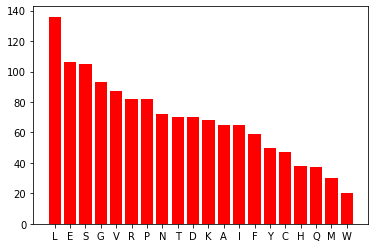

In [96]:
from matplotlib import pyplot as plt

x = [aa[0] for aa in ammino_frequency]
y = [aa[1] for aa in ammino_frequency]

plt.bar(x, y, color = 'red')
plt.show()

### 14) Validazione della sequenza della proteina letta dal file `EMBL`

a) Tradurre in proteina la sequenza della CDS.

**Alternativa1:** traduzione della lista `codon_list` da lista di codoni a lista di amminoacidi e unione in unica stringa con il metodo `join()`.

In [97]:
cds_translation = ''.join([genetic_code_dict[codon] for codon in codon_list[:-1]])

In [98]:
cds_translation

'MGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEY

**Alternativa2:** traduzione con la funzione `sub()`.

    re.sub(regexp, r_arg, string)
    
Come secondo argomento può essere passata una funzione invece di una stringa di sostituzione. In questo caso `sub()` invocherà tale funzione passando come argomento l'oggetto `Match` restituito da ognuna delle operazioni di di ricerca dell'espressione regolare `regexp` nella stringa `string`.

Per tradurre la sequenza della CDS in proteina, il secondo argomento della funzione `sub()` si può usare una *lambda function*, cioé una funzione anonima definita "al volo" secondo la seguente sintassi:

    lambda x: expr
    
dove `x` è l'argomento della funzione ed `expr` è l'espressione che viene valutata e il cui risultato viene poi restituito dalla funzione.

E' sufficiente quindi usare come primo argomento l'espressione regolare `\w{3}` che trova tutte le occorrenze sovrapposte di tre simboli consecutivi (i codoni) e usare la seguente funzione lambda:

    lambda x: genetic_code_dict[x.group()]
    
che prende in input l'oggetto `x` di tipo `Match` generato, ogni volta, da un'occorrenza dell'espressione regolare, cioé un codone (restituito da `x.group()`) e restituisce come risultato il corrispondente amminoacido.

In [99]:
cds_translation2 = re.sub(r'\w{3}', lambda x: genetic_code_dict[x.group()], cds_sequence[:-3])

Verificare che le due alternative portano alla stessa traduzione.

In [100]:
cds_translation2 == cds_translation

True

Verificare infine che la proteina letta dal file `EMBL` è uguale a quella ottenuta per traduzione della CDS.

In [101]:
cds_translation == protein_sequence

True

### 15) Trovare una CDS "sinonima" della precedente ottenuta sostituendo il maggior numero di codoni

a) Costruire il dizionario inverso del codice genetico:

- *chiave*: simbolo di amminoacido
- *valore*: lista dei codoni che corrispondono all'amminoacido

In [103]:
inverse_genetic_code_dict = dict([(l[0], l[1:]) for l in split_genetic_code])

In [104]:
inverse_genetic_code_dict

{'A': ['gct', 'gcc', 'gca', 'gcg'],
 'C': ['tgt', 'tgc'],
 'D': ['gat', 'gac'],
 'E': ['gaa', 'gag'],
 'F': ['ttt', 'ttc'],
 'G': ['ggt', 'ggc', 'gga', 'ggg'],
 'H': ['cat', 'cac'],
 'I': ['att', 'atc', 'ata'],
 'K': ['aaa', 'aag'],
 'L': ['tta', 'ttg', 'ctt', 'ctc', 'cta', 'ctg'],
 'M': ['atg'],
 'N': ['aat', 'aac'],
 'P': ['cct', 'ccc', 'cca', 'ccg'],
 'Q': ['caa', 'cag'],
 'R': ['cgt', 'cgc', 'cga', 'cgg', 'aga', 'agg'],
 'S': ['tct', 'tcc', 'tca', 'tcg', 'agt', 'agc'],
 'T': ['act', 'acc', 'aca', 'acg'],
 'V': ['gtt', 'gtc', 'gta', 'gtg'],
 'W': ['tgg'],
 'Y': ['tat', 'tac'],
 's': ['tga', 'taa', 'tag']}

b) Determinare la CDS sinonima.

In [ ]:
syn_cds_sequence

c) Verificare che fornisca la stessa proteina.

d) Misurare la differenza con la precedente CDS tramite distanza di Hamming, che è il numero di posizioni in cui le due sequenze hanno diverso carattere.

**Esempio**: la distanza di Hamming di `ACGTG` e `GCTTG` è pari a 2, in quanto le basi diverse sono quelle in posizione 1 (`A` e `G`) e quelle in posizione 3 (`G` e `T`).

*Suggerimento*: usare la funzione `range()` passando come unico argomento la lunghezza della CDS, per produrre il range dei suoi indici di posizione. 

In [ ]:
hamming_dist

Percentuale di basi differenti rispetto alla lunghezza delle due CDS:

Numero di possibili CDS che esprimono la stessa proteina: